In [1]:
import babypandas as bpd
import numpy as np
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update(
    "livereveal", {
        "width": "90%",
        "height": "90%",
        "scroll": True,
})

{'width': '90%', 'height': '90%', 'scroll': True}

# DSC 10 Discussion Week 2
---

### For anyone intersted, Jupyter color themes

* Check out this repo if you want some color themes for your Jupyter:
    - https://github.com/dunovank/jupyter-themes

* After installation, you will need to change the PATH variable to use it:
    - https://linuxize.com/post/how-to-add-directory-to-path-in-linux/

* The theme setting I like to use is:
    - jt -T -N -kl -cellw 1050 -tfs 11 -nfs 11 -t chesterish

# Part 1 - Some Work With Arrays
---

Create an array that runs from 0 to 50 (included), with steps of 5 as below:

0, 5, 10, ..., 45, 50

In [2]:
# np.arange(0, 50+1, 5)
np.arange(0, 51, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [3]:
# Another way of doing it for the interested
np.linspace(0, 50, 11)

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

What are the differences compared to arange?

* Instead of step size, we give number of elements
* Elements default to floats
* When we put the range 0,50 both 0 and 50 are included

Make the last 5 elements of the below array negative

In [4]:
my_array = np.arange(0, 51, 5)
my_array

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [5]:
my_array[-5:] = my_array[-5:] * -1
my_array

array([  0,   5,  10,  15,  20,  25, -30, -35, -40, -45, -50])

In [6]:
ones_array = np.ones(5)
ones_array

array([1., 1., 1., 1., 1.])

In [7]:
zeros_array = np.zeros(5)
zeros_array

array([0., 0., 0., 0., 0.])

Given two arrays `a` and `b`, return array `c` with the elements:

$$ c =  a ^ b $$


In [8]:
ones_array = np.ones(5)
ones_array

array([1., 1., 1., 1., 1.])

In [9]:
a = np.ones(5) * 2
a

array([2., 2., 2., 2., 2.])

In [10]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [11]:
c = a ** b
c

array([ 1.,  2.,  4.,  8., 16.])

Given two arrays, find their median value

In [12]:
a = np.arange(5)
b = np.arange(15,21) * -21
print(a)
print(b)

[0 1 2 3 4]
[-315 -336 -357 -378 -399 -420]


Hint: `np.concatenate((array1, array2))` concetenates two arrays

In [13]:
c = np.concatenate((a,b))
c

array([   0,    1,    2,    3,    4, -315, -336, -357, -378, -399, -420])

One alternative, sort the array and find the middle element

In [14]:
c.sort()
c

array([-420, -399, -378, -357, -336, -315,    0,    1,    2,    3,    4])

In [15]:
c[len(c) / 2]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Normal division: /
# Integer division: //
print(len(c) / 2)
print(len(c) // 2)

In [ ]:
c[len(c) // 2]

Better and safer alternative, use a built in function:

`np.median()`

In [16]:
np.median(c)

-315.0

Much easier, and safer. Always try looking for built-in functions for basic
tasks such as finding max, median, summing etc.

# Part 2 - Some Work With Toy Tables
---

Tables are a handy way to store a bunch of related data.

Let's create our own table using the *babypandas package* and play around with it a bit.

As we saw before, we can create a new, empty table by calling bpd.DataFrame(). 

In [17]:
df = bpd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


## We will usually be reading tables from csv files, but let's create a filled table ourself

There are many ways to fill in a table, such as by adding rows / columns (or importing from a .csv file).

Adding rows / columns is a simple way, so let's work on it

Let's create two columns for our Table (DataFrame):

In [18]:
numbers = np.arange(10)
powers = 2 ** (numbers)
print('Numbers:', numbers)
print('Powers:', powers)

Numbers: [0 1 2 3 4 5 6 7 8 9]
Powers: [  1   2   4   8  16  32  64 128 256 512]


In [19]:
# Notice print function is printing the np arrays differently then when you just run them on a cell.
# If you want to print them in the same format you can use:
print('Numbers:', numbers.__repr__())
print('Powers:', powers.__repr__())
# For the curious, __repr__() here is a special method
# It is an advanced topic not part of DSC-10

Numbers: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Powers: array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512])


We can use the `assign` method of DataFrame to add named columns.

We add each column in the format: `column_name, [data]`

The values in a column of a table should have **the same type**, so it makes sense to use np.array where possible!

In [20]:
my_df = bpd.DataFrame().assign(
    EXPONENTS = numbers,
    POWERS = powers
)
my_df

,EXPONENTS,POWERS
0,0,1
1,1,2
2,2,4
3,3,8
4,4,16
5,5,32
6,6,64
7,7,128
8,8,256
9,9,512


Don't forget to reassign to the variable, or your changes will **not** be saved!

In [21]:
# We should reassign the result of each assign() call to a variable to save it
# Below is a wrong way to do it
bigger_df = bpd.DataFrame()
bigger_df.assign(NUMBERS = np.array([2,3,4,1,5]))
bigger_df.assign(OTHER_NUMBERS = np.arange(5))
# Notice the bigger_df DataFrame is empty
print(bigger_df)

Empty DataFrame
Columns: []
Index: []


In [22]:
# We should reassign the result of each assign() call to a variable to save it
# Below is the correct way to do it
bigger_df = bpd.DataFrame()
bigger_df = bigger_df.assign(NUMBERS = np.array([2,3,4,1,5]))
bigger_df = bigger_df.assign(OTHER_NUMBERS = np.arange(5))
bigger_df

,NUMBERS,OTHER_NUMBERS
0,2,0
1,3,1
2,4,2
3,1,3
4,5,4


Let's keep on adding, by chaining our calls to assing() as:
```Python
df = df.assign(__).assign(__).assign(__) # __ is placeholder of a column
```

We can use the 'backslash \' character to divide a single line into multiple lines.
For example the two versions of the code below are the same:
```Python
df = df.assign(__).assign(__).assign(__)
```
```Python
df = df.assign(__) \
       .assign(__) \
       .assign(__)
```
We do not need to do the indentation as above, but it is the customary way to do it

In [23]:
bigger_df = \
bigger_df.assign(STRINGS = np.array(["this","is","a","string","column"])) \
         .assign(BOOLEANS = np.array([False, False, True, True, False])) \
         .assign(SOME_VARS = [[14,2],"hey",True,3.2,2])
bigger_df

,NUMBERS,OTHER_NUMBERS,STRINGS,BOOLEANS,SOME_VARS
0,2,0,this,False,"[14, 2]"
1,3,1,is,False,hey
2,4,2,a,True,True
3,1,3,string,True,3.2
4,5,4,column,False,2


We can't always chain function calls like this in python.

In this case what enables us to chain `assign()` operations like this?

After each call, `assign()` method returns the modified DataFrame,

that is why we can chain assign methods.

We can now do any table operations that we want to this table.

For example we can sort the columns.

What columns can we use to sort by? Are we restricted at all?

How about:
```Python
bigger_df.sort_values(by='BOOLEANS')
```

In [24]:
bigger_df.sort_values(by='BOOLEANS')

,NUMBERS,OTHER_NUMBERS,STRINGS,BOOLEANS,SOME_VARS
0,2,0,this,False,"[14, 2]"
1,3,1,is,False,hey
4,5,4,column,False,2
2,4,2,a,True,True
3,1,3,string,True,3.2


What about:
```Python
bigger_df.sort_values(by='STRINGS')
```

In [25]:
bigger_df.sort_values(by='STRINGS')

,NUMBERS,OTHER_NUMBERS,STRINGS,BOOLEANS,SOME_VARS
2,4,2,a,True,True
4,5,4,column,False,2
1,3,1,is,False,hey
3,1,3,string,True,3.2
0,2,0,this,False,"[14, 2]"


Finally, what about:
```Python
bigger_df.sort_values(by='SOME_VARS')
```

In [26]:
bigger_df.sort_values(by='SOME_VARS')

TypeError: '<' not supported between instances of 'str' and 'list'

We can get a column of data by calling `get` on the DataFrame object.  
We should pass in the argument `column_name`; the name of the column we want.

In [27]:
help(bpd.DataFrame.get)

Help on function get in module babypandas.bpd:

get(self, key)
    Return column or columns from data frame.
    
    Parameters
    ----------
    key : str or iterable of strings
        Column label or iterable of column labels
    
    Returns
    -------
    series_or_df : Series or DataFrame
        Series with the corresponding label or DataFrame with the
        corresponding column labels.
    
    Raises
    ------
    KeyError
        If any column named in `key` not found in columns.
    
    Examples
    --------
    >>> df = bpd.DataFrame().assign(letter=['a', 'b', 'c'],
    ...                             count=[9, 3, 3],
    ...                             points=[1, 2, 2])
    >>> df.get('letter')
    0    a
    1    b
    2    c
    Name: letter, dtype: object
    >>> df.get(['count', 'points'])
       count  points
    0      9       1
    1      3       2
    2      3       2



In [28]:
bigger_df.get("NUMBERS")

0    2
1    3
2    4
3    1
4    5
Name: NUMBERS, dtype: int64

In [29]:
bigger_df.get("BOOLEANS")

0    False
1    False
2     True
3     True
4    False
Name: BOOLEANS, dtype: bool

In [30]:
bigger_df.get("SOME_VARS")

0    [14, 2]
1        hey
2       True
3        3.2
4          2
Name: SOME_VARS, dtype: object

Notice the data type of each column, stated by the `dtype` identifier. 

For the `SOME_VARS` column, baby pandas automatically assigned the datatype `object`

to keep the column's data type uniform.

`Object` is the most generic type in python, it can represent any type of object.

Although we have this generalist type, it is best if we use a single fixed column data type

such as *int*, *float*, *string* etc.

So let's remove this column from our DataFrame to be consistent. 

We can use the `drop()` method to do this

In [31]:
bigger_df.drop(columns="SOME_VARS")
bigger_df

,NUMBERS,OTHER_NUMBERS,STRINGS,BOOLEANS,SOME_VARS
0,2,0,this,False,"[14, 2]"
1,3,1,is,False,hey
2,4,2,a,True,True
3,1,3,string,True,3.2
4,5,4,column,False,2


Why didn't it work?

In [32]:
bigger_df = bigger_df.drop(columns="SOME_VARS")
bigger_df

,NUMBERS,OTHER_NUMBERS,STRINGS,BOOLEANS
0,2,0,this,False
1,3,1,is,False
2,4,2,a,True
3,1,3,string,True
4,5,4,column,False


By using the `get()` function we can get columns as `Series` objects.

Notice the difference between a `DataFrame` and `Series`

* Table: DataFrame
* Column: Series

In [33]:
bigger_df.get(NUMBERS) * 100

NameError: name 'NUMBERS' is not defined

What went wrong this time?

In [ ]:
bigger_df.get("NUMBERS") * 100

Did the corresponding column in `bigger_df` change?

In [34]:
bigger_df

,NUMBERS,OTHER_NUMBERS,STRINGS,BOOLEANS
0,2,0,this,False
1,3,1,is,False
2,4,2,a,True
3,1,3,string,True
4,5,4,column,False


We should use the `assign()` method if we want to change the column.

Any questions until now?

# Part 3 - Working on real data (finally!)
--- 
Let's start using some real world data

# Ultimate Halloween Candy Showdown
---
269,000 user submitted winners of head to head candy matchups

In [35]:
candy = bpd.read_csv("data/candy.csv")
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [36]:
candy = candy.set_index("competitorname")

In [37]:
candy.take(np.arange(5))

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


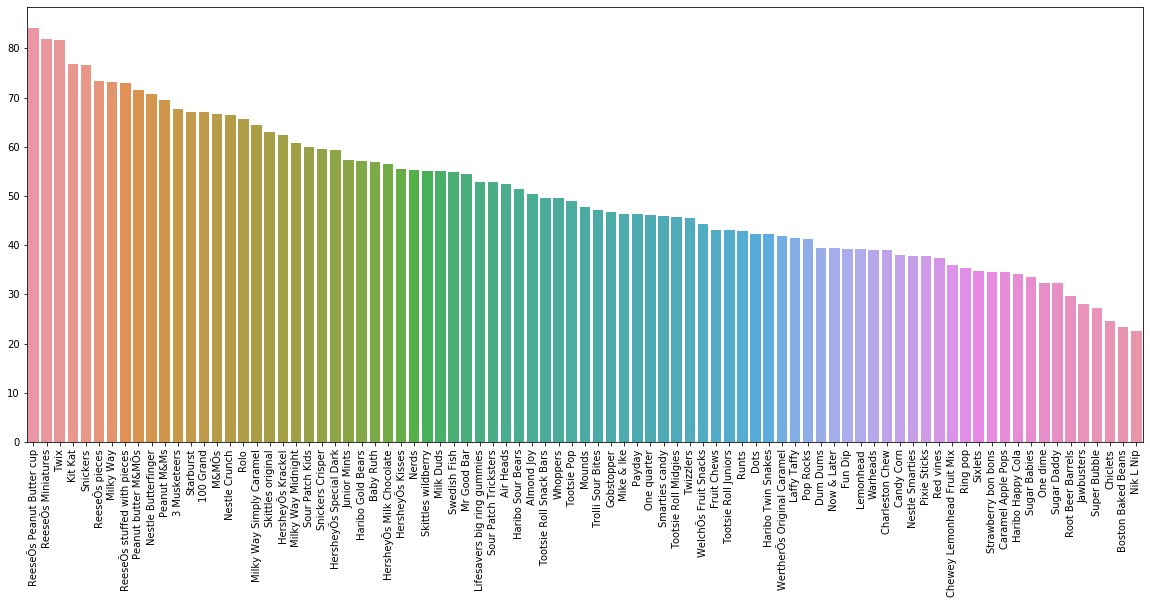

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
candy = candy.sort_values(by = "winpercent", ascending=False)
plt.figure(figsize=(20,8))
x = candy.index.to_numpy()
y = candy.get("winpercent").to_numpy()
sns.barplot(x, y)
plt.xticks(rotation="vertical");

Plot the top 20 companies by winpercent, for easier readability.

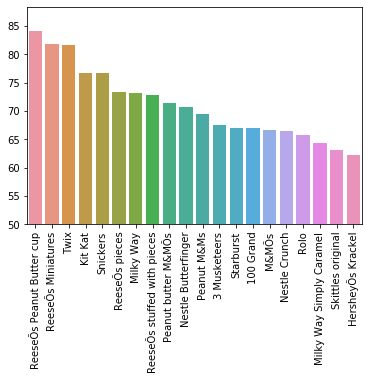

In [39]:
array_cutoff = 20
x = candy.index.to_numpy()[:array_cutoff]
y = candy.get("winpercent").to_numpy()[:array_cutoff]
sns.barplot(x, y)
plt.xticks(rotation="vertical");
plt.ylim(bottom = 50)
plt.show()

# Let's go over some basic operations we can do on the columns of this dataset
---

By getting familiar with our dataset, it should be easier for us to answer questions we have a bit later.

Some of the functions we can use are: 
```Python
bpd.DataFrame.get()
bpd.DataFrame.sort_values()
bpd.DataFrame.assign()
bpd.DataFrame.drop()
bpd.DataFrame.set_index()
bpd.Series.loc[]
bpd.Series.iloc[]
bpd.Series.aggragate() # aggragate may be replaced by any other aggragating function
# And more...
```

If we need any more information, we can always use help

In [40]:
# Notice while calling help, we don't put parantheses after sort_values
help(bpd.DataFrame.sort_values)

Help on function sort_values in module babypandas.bpd:

sort_values(self, by, *, ascending=True)
    Sort by the values in column(s) named in `by`.
    
    Parameters
    ----------
    by : str or list of str
        Name or list of column names to sort by.
    ascending : {True, False} or list of bool, keyword only
        Sort ascending vs. descending. Specify list for multiple sort
        orders.  If this is a list of bools, must match the length of the
        `by`.  Default is True.
    
    Returns
    -------
    sorted_obj : DataFrame
    
    Raises
    ------
    KeyError
        If `by` not found in columns.
    
    Examples
    --------
    >>> df = bpd.DataFrame().assign(name=['Sally', 'George', 'Bill', 'Ann'],
    ...                             age=[21, 25, 18, 28],
    ...                             height_cm=[161, 168, 171, 149])
    >>> df.sort_values(by='age')
         name  age  height_cm
    2    Bill   18        171
    0   Sally   21        161
    1  George

Find the candy brand(s) which have winrates between 25 to 30. How should we proceed?

We should first create a boolean mask that returns True if winpercent is between 25 to 30

Then we can use this boolean mask to index the DataFrame `candy`.

In [41]:
boolean_mask = (20 <= candy.get("winpercent")).to_numpy() \
                & (candy.get("winpercent") <= 30).to_numpy()
print(boolean_mask)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True  True  True  True  True
  True]


We can count how many elements we will get at this point.

An alternative to count: By using the `sum()` function of the `Series` object.

Will this work? The Series contains boolean variables.

In [42]:
brand_count = (boolean_mask).sum()
brand_count

6

While summing the boolean values, it will treat *True* as 1, *False* as 0

What if we do it the way below:
```Python
brand_count = sum(boolean_mask)
brand_count
```
Will it work correctly?

In [43]:
brand_count = sum(boolean_mask)
brand_count

6

In [44]:
type(boolean_mask)

numpy.ndarray

We should be using the .sum() function of the Series object.

For numpy arrays and lists we could use the builtin sum() of Python and get away with it, although it is slower.

For the Series objects this is not the case.

In [45]:
boolean_mask = (20 <= candy.get("winpercent")).to_numpy() \
                & (candy.get("winpercent") <= 30).to_numpy()
candy[boolean_mask]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
competitorname,,,,,,,,,,,,
Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341


Get the sugar percent of the top 10 and worst 10 brands (by winpercent)

How to proceed?

In [46]:
candy = candy.sort_values(by = "winpercent", ascending=False)
top10_winrates = candy.get(["winpercent", "sugarpercent"]).iloc[:10]
top10_winrates

,winpercent,sugarpercent
competitorname,,
ReeseÕs Peanut Butter cup,84.180290,0.720
ReeseÕs Miniatures,81.866257,0.034
Twix,81.642914,0.546
Kit Kat,76.768600,0.313
Snickers,76.673782,0.546
ReeseÕs pieces,73.434990,0.406
Milky Way,73.099556,0.604
ReeseÕs stuffed with pieces,72.887901,0.988
Peanut butter M&MÕs,71.465050,0.825


In [47]:
bottom10 = candy.get(["winpercent", "sugarpercent"]).iloc[-10:]
bottom10

,winpercent,sugarpercent
competitorname,,
Haribo Happy Cola,34.158958,0.465
Sugar Babies,33.437550,0.965
One dime,32.261086,0.011
Sugar Daddy,32.230995,0.418
Root Beer Barrels,29.703691,0.732
Jawbusters,28.127439,0.093
Super Bubble,27.303865,0.162
Chiclets,24.524988,0.046
Boston Baked Beans,23.417824,0.313


Do you think winpercent would be related to sugarpercent?

Let's plot winpercent and sugarpercent on a scatterplot to see if we can see a pattern

Text(0.5, 1.0, 'Winpercent vs Sugarpercent')

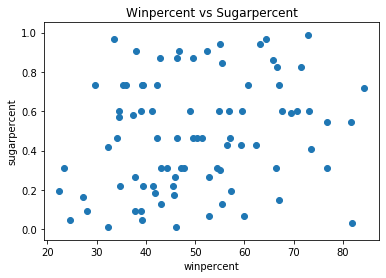

In [48]:
import matplotlib.pyplot as plt
# Plot winrate vs sugarrate
x = candy.get("winpercent")
y = candy.get("sugarpercent")
plt.scatter(x,y)
plt.xlabel("winpercent")
plt.ylabel("sugarpercent")
plt.title("Winpercent vs Sugarpercent")

It is hard to see a clear correlation from the plot.

We need deeper analysis to find the answer.

# More Data Examples!
---

This data was compiled from a number of queries from the NOAA (National Oceanic and Atmospheric Administration) website. Contains average monthly temperature for 9 different regions from 2000 to 2018.

NOAA National Centers for Environmental information, Climate at a Glance: Regional Time Series, published October 2018, retrieved on October 18, 2018 from https://www.ncdc.noaa.gov/cag/

In [49]:
temps = bpd.read_csv("data/temperatures.csv")
temps

,Year,Month,Region,Average Temperature
0,2000,1,Northeast Climate Region,21.4
1,2000,2,Northeast Climate Region,27.2
2,2000,3,Northeast Climate Region,39.1
3,2000,4,Northeast Climate Region,44.2
4,2000,5,Northeast Climate Region,56.6
...,...,...,...,...
2020,2018,5,West Climate Region,60.8
2021,2018,6,West Climate Region,69.9
2022,2018,7,West Climate Region,78.6
2023,2018,8,West Climate Region,75.1


It contains a `Year` (2000 to 2018), `Month` (1 to 12), `Region` (a climate region), and `Average Temperature` (the average temperature for that year/month/region in degrees Farenheit).

We can't set a new index as there are no unique value among the columns.

In [50]:
# As a helping hand to get started, let's find out what regions we have
np.unique(temps.get("Region"))

array(['Northeast Climate Region',
       'Northern Rockies and Plains Climate Region',
       'Northwest Climate Region', 'Ohio Valley Climate Region',
       'South Climate Region', 'Southeast Climate Region',
       'Southwest Climate Region', 'Upper Midwest Climate Region',
       'West Climate Region'], dtype=object)

# Let's play around with the dataset
---

Show only data for the region `Ohio Valley`
```Python
region = "Ohio Valley Climate Region"
```

In [51]:
region = "Ohio Valley Climate Region"
mask = temps.get("Region") == region
print("No of datapoints in Ohio:", mask.sum(), end='\n\n')
print(mask)

No of datapoints in Ohio: 225

0       False
1       False
2       False
3       False
4       False
        ...  
2020    False
2021    False
2022    False
2023    False
2024    False
Name: Region, Length: 2025, dtype: bool


In [52]:
# find the data for just one region
temps[mask]

,Year,Month,Region,Average Temperature
450,2000,1,Ohio Valley Climate Region,30.8
451,2000,2,Ohio Valley Climate Region,40.1
452,2000,3,Ohio Valley Climate Region,47.7
453,2000,4,Ohio Valley Climate Region,52.6
454,2000,5,Ohio Valley Climate Region,65.8
...,...,...,...,...
670,2018,5,Ohio Valley Climate Region,70.8
671,2018,6,Ohio Valley Climate Region,74.7
672,2018,7,Ohio Valley Climate Region,75.9
673,2018,8,Ohio Valley Climate Region,75.1


Find the maximum average temperature for each region:
(using `groupby`)

In [53]:
temps.groupby("Region").max()

,Year,Month,Average Temperature
Region,,,
Northeast Climate Region,2018,12,72.4
Northern Rockies and Plains Climate Region,2018,12,73.9
Northwest Climate Region,2018,12,70.0
Ohio Valley Climate Region,2018,12,80.6
South Climate Region,2018,12,86.1
Southeast Climate Region,2018,12,82.4
Southwest Climate Region,2018,12,77.7
Upper Midwest Climate Region,2018,12,75.4
West Climate Region,2018,12,78.6


Find the maximum average temperature for each year including and after 2010

In [54]:
temps_after_05 = temps[temps.get("Year") >= 2010]
temps_after_05.groupby("Year").mean()

,Month,Average Temperature
Year,,
2010,6.5,52.218519
2011,6.5,52.270370
2012,6.5,54.346296
2013,6.5,51.603704
2014,6.5,51.676852
2015,6.5,53.503704
2016,6.5,54.004630
2017,6.5,53.591667
2018,5.0,56.128395


Find the maximum average temperature for each year between 2000 to 2005
for the `West Climate Region`

In [55]:
region = "West Climate Region"
mask1 = temps.get("Region") == region
temps_new = temps[mask1]
mask2 = 2000 <= temps_new.get("Year") <= 2005
temps_new = temps_new[mask2]
temps_new.groupby("Year").max()

,Month,Region,Average Temperature
Year,,,
2000,12,West Climate Region,73.8
2001,12,West Climate Region,75.2
2002,12,West Climate Region,77.0
2003,12,West Climate Region,78.0
2004,12,West Climate Region,75.1
2005,12,West Climate Region,77.4


In [56]:
# find the average temperature for each month
temps.groupby("Month").mean()

,Year,Average Temperature
Month,,
1,2009.0,31.523392
2,2009.0,34.287135
3,2009.0,42.746784
4,2009.0,51.252047
5,2009.0,60.442690
...,...,...
8,2009.0,72.383626
9,2009.0,65.511696
10,2008.5,54.161111


What's up with the year column?

In [57]:
temps.drop(columns = "Year").groupby("Month").mean()

,Average Temperature
Month,
1,31.523392
2,34.287135
3,42.746784
4,51.252047
5,60.442690
...,...
8,72.383626
9,65.511696
10,54.161111
